## AIM: TO DETECT THE PURPLE AND RED FRUITS IN THE GIVEN IMAGE USING OPENCV

This is an example of static object detection. This program implements color detection through 2 masks that filter purple and red color out. The image is further processed to remove unnecessary noise and give importance to the fruits. Importance is also given by implementing an area threshold that effectively filters out noise and shows only the fruits that are large enough to be inside that area threshold.

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

We first create the image object 'img' and convert it to RGB. OpenCV uses BGR as the default colour space for image processing. However, jupyter notebooks, use RGB as the default colour space to do the same. Performing image operations on a BGR image in this notebook give undesirable outputs.


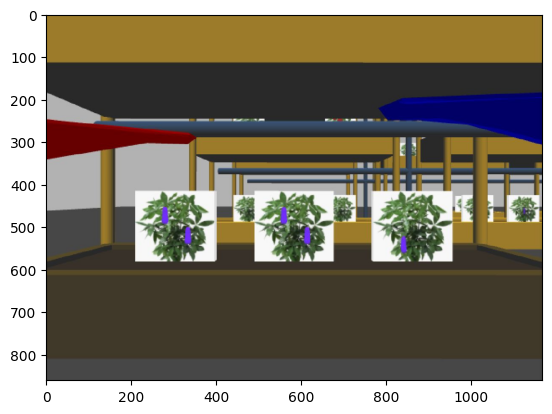

In [2]:
img = cv.imread(r"D:\workspace\python programs\openCV\application\fruit detection\given_img.jpeg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

Two masks (in the form of 1D arrays that contain Hue, Saturation, Value values) are defined below. One is for filtering out the purple colour and the other is for filtering out the red colour. 

For example, the red mask will filter pixels with shades from the values in 'red_L' to the values in 'red_H'.

In [3]:
purple_L = np.array([121, 34, 59])
purple_H = np.array([180, 255, 255])

red_L = np.array([0, 75, 0])
red_H = np.array([14, 204, 255])

The color space of the image is now converted to HSV. HSV is better than RGB or BGR regaridng image manipulation because with RGB, only the 3 hue values of red color, green color, and blue color can be changed. But in case of HSV:

<br>1. The 'Hue' value itself can be tuned to any color. (represents a color palette from 0 degrees to 180 degrees)
<br>2. The 'Saturation' value decides how intense that color should be. (lowest value turns the image into a grayscale one and the highest shows the most intense shade of that color)
<br>3. The 'Value' value decides how dark or bright that color should be. (lowest value turns the image black and the highest value turns it white)

Note: In conventional HSV color space, Hue lies between 0 to 360 degrees, but in openCV, it lies between 0 to 180 degrees. Hue values can be converted in terms of openCV simply by dividing them by 2.

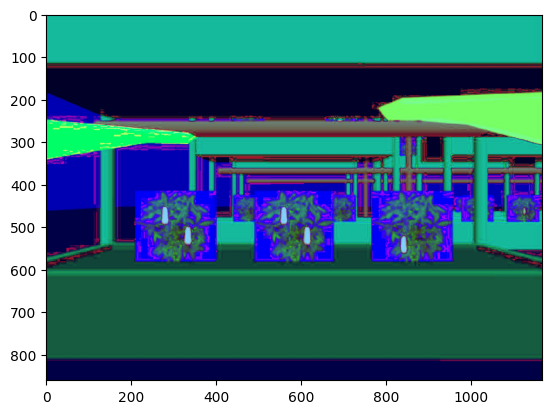

In [4]:
hsv = cv.cvtColor(img,cv.COLOR_RGB2HSV)
plt.imshow(hsv)
plt.show()

The image below shows the objects in the image that the purple mask was able to figure out. Yes there is some noise here and there especially inside the 2 shapes but erosion will reduce this noise and the area filter won't let it creep through the final output.

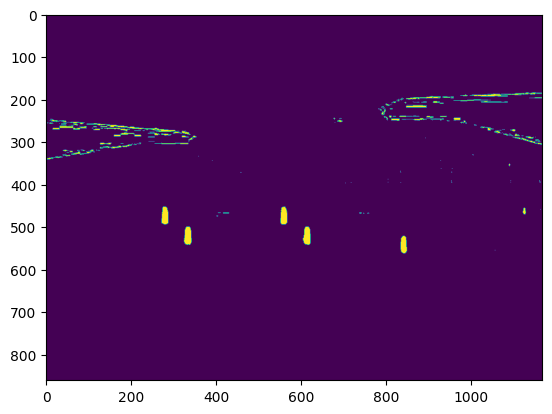

In [5]:
purple_mask = cv.inRange(hsv, purple_L, purple_H)
plt.imshow(purple_mask)
plt.show()

The result after eroding the noise in the above output 4 times.

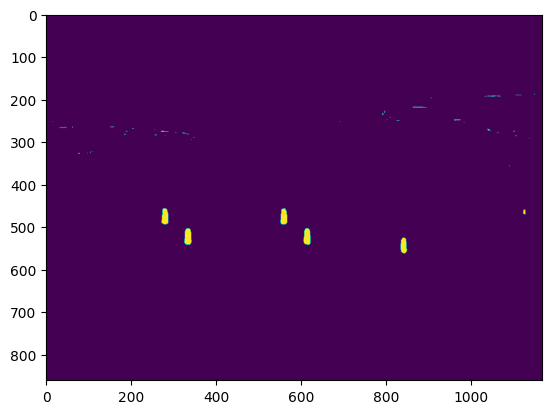

In [6]:
purple_mask_2 = cv.erode(purple_mask, (3,3), iterations = 4)
plt.imshow(purple_mask_2)
plt.show()

openCV now detects contours for the image that has been filtered by the purple mask. It highlights the fruits but also some noise that still crept in despite the 4 iterations of erosion. This noise is blocked by an area filter that filters contours smaller than 40 pixels of area. The contours that are larger than this threshold are added to the list 'purple_filtered_contours'.

The coordinates of all contours from the same list are extracted and stored. Then, rectangles are drawn on the original image with these coordinates that detect the purple fruits, and also count them.

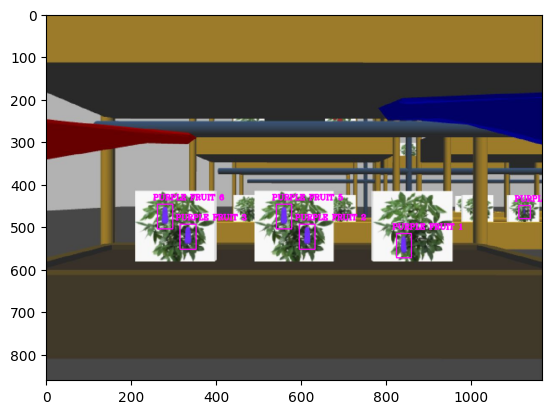

In [7]:
purple_contours, _ = cv.findContours(purple_mask_2, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
purple_filtered_contours = [cont for cont in purple_contours if cv.contourArea(cont) > 40]

purple_count = 0
for contour in purple_filtered_contours:
    purple_count += 1 
    x, y, w, h = cv.boundingRect(contour)
    cv.rectangle(img, (x-10, y-10), (x+w+10, y+h+10), (255, 0, 255), 2)
    cv.putText(img,f'PURPLE FRUIT {purple_count}',(x-20,y-20),cv.FONT_HERSHEY_TRIPLEX,0.6,(255, 0, 255),thickness = 2)

plt.imshow(img)
plt.show()

Repeat the same process for detecting red fruits. A mask to filter out red color is created. Again, the fruits are visible as 2 dots at coordinates (600, 200). But noise still exists.

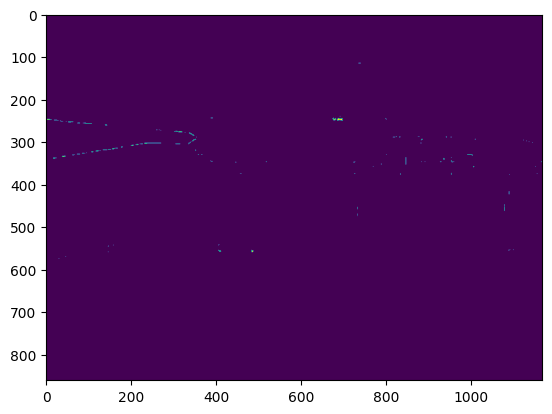

In [8]:
red_mask = cv.inRange(hsv, red_L, red_H)
plt.imshow(red_mask)
plt.show()

In this case, the fruits are very small and the shape of the left is also red in color. The mask's values need to be tuned to fine values to ensure that the red colour within that shape is filtered out and the dots at coordinates (600, 200) are still retained. 

For tuning a mask like this, it is obvious that some part of the actual fruits that we are detecting might also get filtered out. To give the fruits more importance, the image wis dilated 2 times in addition to the erosion.

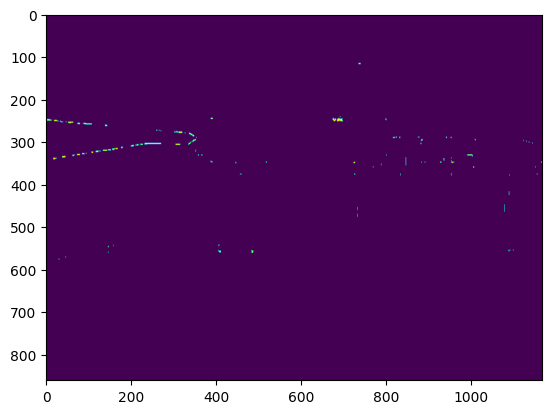

In [9]:
red_mask_2 = cv.dilate(red_mask, (3,3), iterations = 2)
plt.imshow(red_mask_2)
plt.show()

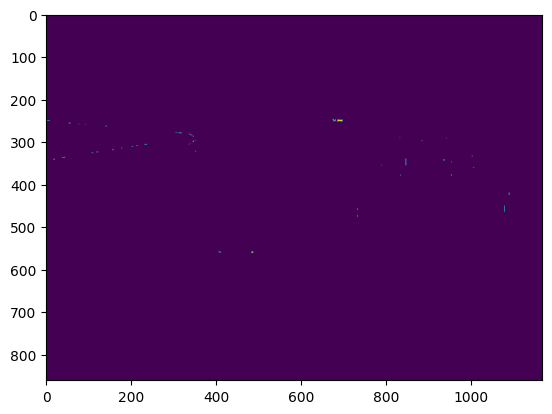

In [10]:
red_mask_3 = cv.erode(red_mask_2, (3,3), iterations = 3)
plt.imshow(red_mask_3)
plt.show()

Contours on the parts of the image filtered by the red mask having area greater than 7 pixels are added to the list 'red_filtered_contours'. From this list, coordinates of the contours are extracted and red rectangles are drawn on the original image at the same coordinates.

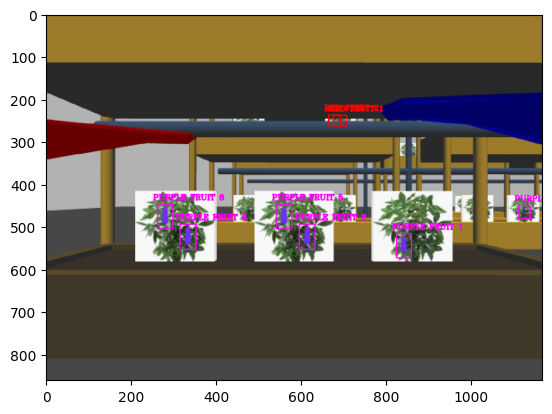

In [11]:
red_contours, _ = cv.findContours(red_mask_3, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
red_filtered_contours = [cont for cont in red_contours if cv.contourArea(cont) > 7]

red_count = 0
for contour in red_filtered_contours:
    red_count += 1 
    x, y, w, h = cv.boundingRect(contour)
    cv.rectangle(img, (x-10, y-10), (x+w+10, y+h+10), (255, 0, 0), 2)
    cv.putText(img,f'RED FRUIT {red_count}',(x-20,y-20),cv.FONT_HERSHEY_TRIPLEX,0.6,(255,0,0),thickness = 2)

plt.imshow(img)
plt.show()